In [47]:
# Import the required library

import tensorflow.contrib.layers as lays
import numpy as np
from skimage import transform
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 

def autoencoder(inputs):
    # encoder
    # 32 x 32 x 1   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  8 x 8 x 16
    # 8 x 8 x 16    ->  2 x 2 x 8
    net = lays.conv2d(inputs, 32, [5, 5], stride=2, padding='SAME')
    #print(net.get_shape())
    net = lays.conv2d(net, 16, [5, 5], stride=2, padding='SAME')
    #print(net.get_shape())
    net = lays.conv2d(net, 8, [5, 5], stride=1, padding='SAME')
    #print(net.get_shape())
    # decoder
    # 2 x 2 x 8    ->  8 x 8 x 16
    # 8 x 8 x 16   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  32 x 32 x 1
    net = lays.conv2d_transpose(net, 16, [5, 5], stride=1, padding='SAME')
    #print(net.get_shape())
    net = lays.conv2d_transpose(net, 32, [5, 5], stride=2, padding='SAME')
    #print(net.get_shape())
    net = lays.conv2d_transpose(net, 1, [5, 5], stride=2, padding='SAME', activation_fn=tf.nn.tanh)
    #print(net.get_shape())
    return net

def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs

# Introduce Gaussian Noise
def noisy(image):
    row,col= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy
    

# Introduce Salt and Pepper Noise
def s_p(image):
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.05
    out = np.copy(image)
      # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

      # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

ae_inputs = tf.placeholder(tf.float32, (None, 28, 28, 1))  # input to the network (MNIST images)
ae_inputs_noise = tf.placeholder(tf.float32, (None, 28, 28, 1)) 
ae_outputs = autoencoder(ae_inputs_noise)  # create the Autoencoder network

# calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))  # claculate the mean square error loss
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# initialize the network
init = tf.global_variables_initializer()

batch_size = 500  # Number of samples in each batch
epoch_num = 5     # Number of epochs to train the network
lr = 0.001        # Learning rate

# read MNIST dataset
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# calculate the number of batches per epoch
batch_per_ep = mnist.train.num_examples // batch_size
'''
with tf.Session() as sess:
    sess.run(init)
    for ep in range(epoch_num):  # epochs loop
        for batch_n in range(batch_per_ep):  # batches loop
            batch_img, batch_label = mnist.train.next_batch(batch_size)  # read a batch
            batch_img = batch_img.reshape((-1, 28, 28, 1))               # reshape each sample to an (28, 28) image
            #batch_img = resize_batch(batch_img)                          # reshape the images to (32, 32)
            image_arr = []
            for i in range(len(batch_img)):
                img = batch_img[i,:,:,0]
                img = noisy(img)
                image_arr.append(img)
            image_arr = np.array(image_arr)
            image_arr = image_arr.reshape(-1,28,28,1)
            batch_img = image_arr
            _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img,ae_inputs_noise:image_arr})
            print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))
            
    # test the trained network
    batch_img, batch_label = mnist.test.next_batch(50)
    batch_img = batch_img.reshape((-1, 28, 28, 1))
    image_arr = []
    
    for i in range(50):
        img = batch_img[i,:,:,0]
        img = noisy(img)
        image_arr.append(img)
    image_arr = np.array(image_arr)
    image_arr = image_arr.reshape(-1,28,28,1)
    batch_img = image_arr
            
    recon_img = sess.run([ae_outputs], feed_dict={ae_inputs_noise: batch_img})[0]

    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(recon_img[i, ..., 0], cmap='gray')
    plt.figure(2)
    plt.title('Input Images with Gaussian Noise')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(batch_img[i, ..., 0], cmap='gray')
    plt.show()
'''
''

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


''

In [48]:
sess = tf.Session()
sess.run(init)
for ep in range(epoch_num):  # epochs loop
    for batch_n in range(batch_per_ep):  # batches loop
        batch_img, batch_label = mnist.train.next_batch(batch_size)  # read a batch
        batch_img = batch_img.reshape((-1, 28, 28, 1))               # reshape each sample to an (28, 28) image
        #batch_img = resize_batch(batch_img)                          # reshape the images to (32, 32)
        image_arr = []
        for i in range(len(batch_img)):
            img = batch_img[i,:,:,0]
            img = noisy(img)
            image_arr.append(img)
        image_arr = np.array(image_arr)
        image_arr = image_arr.reshape(-1,28,28,1)
        batch_img = image_arr
        _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img,ae_inputs_noise:image_arr})
        print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))

Epoch: 1 - cost= 0.21393
Epoch: 1 - cost= 0.21245
Epoch: 1 - cost= 0.21073
Epoch: 1 - cost= 0.20508
Epoch: 1 - cost= 0.20019
Epoch: 1 - cost= 0.19849
Epoch: 1 - cost= 0.19105
Epoch: 1 - cost= 0.18658
Epoch: 1 - cost= 0.18668
Epoch: 1 - cost= 0.18447
Epoch: 1 - cost= 0.18168
Epoch: 1 - cost= 0.17890
Epoch: 1 - cost= 0.17970
Epoch: 1 - cost= 0.17812
Epoch: 1 - cost= 0.18023
Epoch: 1 - cost= 0.18033
Epoch: 1 - cost= 0.17794
Epoch: 1 - cost= 0.17640
Epoch: 1 - cost= 0.17611
Epoch: 1 - cost= 0.17632
Epoch: 1 - cost= 0.17393
Epoch: 1 - cost= 0.17376
Epoch: 1 - cost= 0.17209
Epoch: 1 - cost= 0.17076
Epoch: 1 - cost= 0.17094
Epoch: 1 - cost= 0.16948
Epoch: 1 - cost= 0.16902
Epoch: 1 - cost= 0.16657
Epoch: 1 - cost= 0.16405
Epoch: 1 - cost= 0.16481
Epoch: 1 - cost= 0.16207
Epoch: 1 - cost= 0.16165
Epoch: 1 - cost= 0.16140
Epoch: 1 - cost= 0.16011
Epoch: 1 - cost= 0.15837
Epoch: 1 - cost= 0.15785
Epoch: 1 - cost= 0.15569
Epoch: 1 - cost= 0.15630
Epoch: 1 - cost= 0.15461
Epoch: 1 - cost= 0.15220


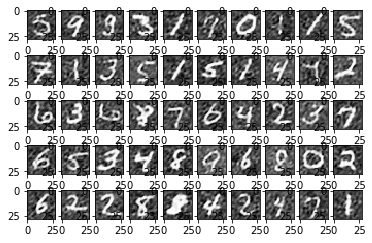

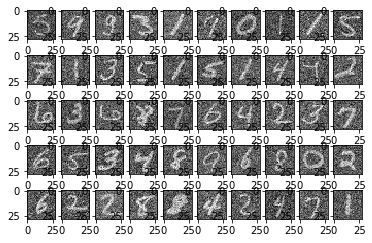

In [49]:
# test the trained network
batch_img, batch_label = mnist.test.next_batch(50)
batch_img = batch_img.reshape((-1, 28, 28, 1))
image_arr = []

for i in range(50):
    img = batch_img[i,:,:,0]
    img = noisy(img)
    image_arr.append(img)
image_arr = np.array(image_arr)
image_arr = image_arr.reshape(-1,28,28,1)
batch_img = image_arr
        
recon_img = sess.run([ae_outputs], feed_dict={ae_inputs_noise: batch_img})[0]

# plot the reconstructed images and their ground truths (inputs)
plt.figure(1)
plt.title('Reconstructed Images')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap='gray')
plt.figure(2)
plt.title('Input Images with Gaussian Noise')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(batch_img[i, ..., 0], cmap='gray')
plt.show()

In [50]:
sess.close()